### Mini Project: Rakamin Academy
# **Predict Customer Clicked Ads Classification**

Author : Faiz Naida Salimah - Data Science Batch 27

---
<br>

**Table of Content:**
- Introduction
- Load Dataset
- Exploratory Data Analysis
- Data Preprocessing
- Modeling
- Save Model
<br>
<br>

# **Introduction**

**Background** <br>
Seiring berkembangnya zaman, perusahaan harus mampu mengoptimalkan metode iklan mereka di platform digital untuk menarik calon pelanggan potensial dengan biaya yang minimal. Hal ini dilakukan dengan tujuan meningkatkan konversi, yaitu jumlah pelanggan potensial yang melakukan pembelian setelah mengklik iklan. Namun, untuk mencapai tujuan ini, perusahaan harus dapat melakukan prediksi click-through yang akurat. Click-through rate yang akurat sangat penting dalam menentukan keberhasilan kampanye iklan digital. Tanpa prediksi yang akurat, perusahaan mungkin akan mengeluarkan biaya yang besar tanpa hasil yang signifikan.

**Goals** <br>
Membuat machine learning model yang dapat mendeteksi potential user untuk convert atau tertarik pada sebuah iklan, sehingga perusahaan bisa mengoptimalkan cost dalam beriklan.

**Objective**
- Memprediksi user yang memiliki potensi untuk klik iklan atau tidak dengan akurasi 90%
- Mendapatkan insight mengenai pola potensial user yang klik iklan
- Memberikan rekomendasi bisnis berdasarkan hasil analisis dan model

**Business Metric**
Click-through rate <br>
<br>

# **Load Dataset**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.sample(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
370,370,58.60,50,317803500.0,113.70,Perempuan,1/28/2016 7:10,Yes,Bandung,Jawa Barat,Furniture
507,507,49.99,41,427477820.0,121.07,Perempuan,3/24/2016 9:34,Yes,Makassar,Sulawesi Selatan,Furniture
143,143,83.67,44,421349040.0,234.26,Laki-Laki,2/6/2016 23:08,No,Balikpapan,Kalimantan Timur,Finance


# **Exploratory Data Analysis**

### Overview Data
---

Melakukan investigasi awal terhadap data untuk memahami karakteristik dan informasi yang terkandung didalamnya termasuk missing value dan duplikat.

In [3]:
df.shape

(1000, 11)

In [4]:
# overview
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:10]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.0,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88...."
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23, 33, 48, 30, 20, 49]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58, 226.74..."
5,Male,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,object,0,0.0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Med..."
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


In [5]:
df.duplicated().sum()

0

In [6]:
# numerikal fitur
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
nums

['Unnamed: 0',
 'Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage']

In [7]:
# kategorikal fitur
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
cats

['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

Key Takeaways:
- Dataset terdiri dari **1000 baris dan 11 fitur** dengan **5 fitur numerikal** dan **6 fitur kategorikal**
- Terdapat **missing value** pada fitur `Daily Time Spent on Site`, `Area Income`, `Daily Internet Usage`, dan `Male`
- Tidak ada duplikat data
- Timestamp direkomendasikan menggunakan tipe data datetime atau dapat dapat dilakukan ekstraksi

### Statistical Summary
---

In [8]:
df[nums].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,500.0,289.0,0.0,250.0,500.0,749.0,999.0
Daily Time Spent on Site,987.0,65.0,16.0,33.0,51.0,68.0,78.0,91.0
Age,1000.0,36.0,9.0,19.0,29.0,35.0,42.0,61.0
Area Income,987.0,384864671.0,94079990.0,97975500.0,328632990.0,399068320.0,458355450.0,556393600.0
Daily Internet Usage,989.0,180.0,44.0,105.0,139.0,183.0,219.0,267.0


Key Takeaways:
- Dilihat dari nilai mean dan median yang tidak begitu jauh nilainya, distribusi data cenderung mendekati normal
- Mayoritas user menghabiskan **waktu di suatu situs** adalah **68 menit (1 jam)**
- Mayoritas **pemakaian internet harian** user adalah **183 menit (3 jam)**
- Mayoritas **pendapatan** user **Rp399.068.320/tahun**
- Rentang usia user 19 – 61 tahun, dengan mayoritas **35 tahun**

In [9]:
df[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


Key Takeaways:
- Fitur target atau `Clicked on Ad` memiliki jumlah value **Yes** dan **No** yang **seimbang**
- Akurasi cocok digunakan untuk data yang seimbang. Akurasi menggambarkan seberapa sering model membuat prediksi yang benar

### Univariate Analysis
---

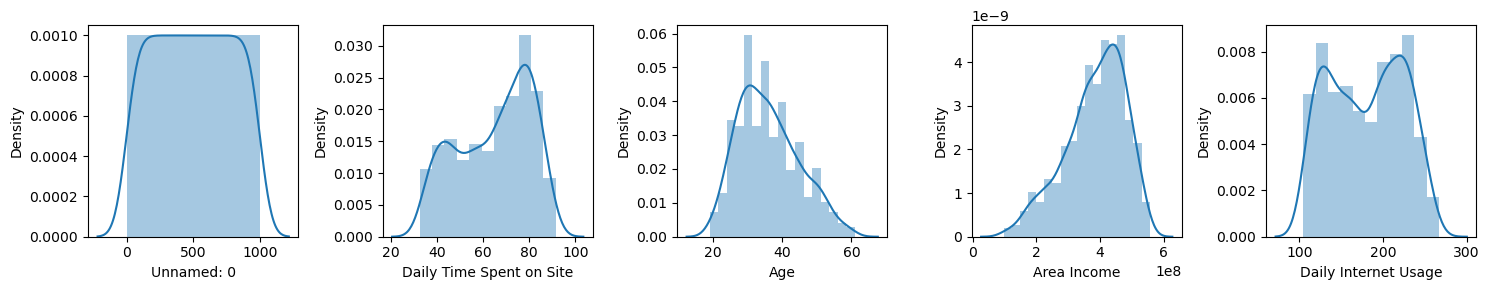

In [10]:
# distribusi menggunakan displot
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

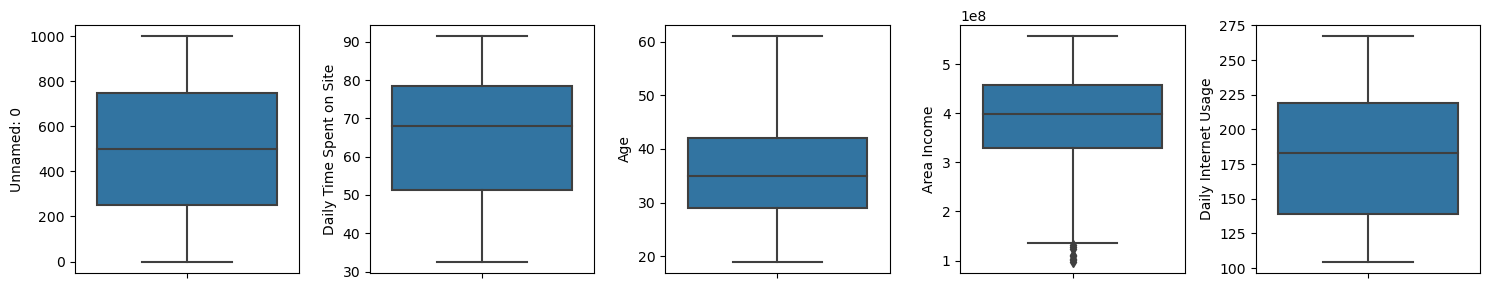

In [11]:
# distribusi menggunakan boxplot
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(df, y=df[nums[i]], orient='v')
    plt.tight_layout()

Key Takeaways:
- Fitur `Area Income` memiliki outlier, namun masih dapat ditoleransi karena bukan nilai yang ekstrim

In [12]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom Male:
--------------------------------------------------
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value count kolom Timestamp:
--------------------------------------------------
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64

Value count kolom Clicked on Ad:
--------------------------------------------------
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count kolom city:
--------------------------------------------------
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tanger

### Bivariate Analysis
---

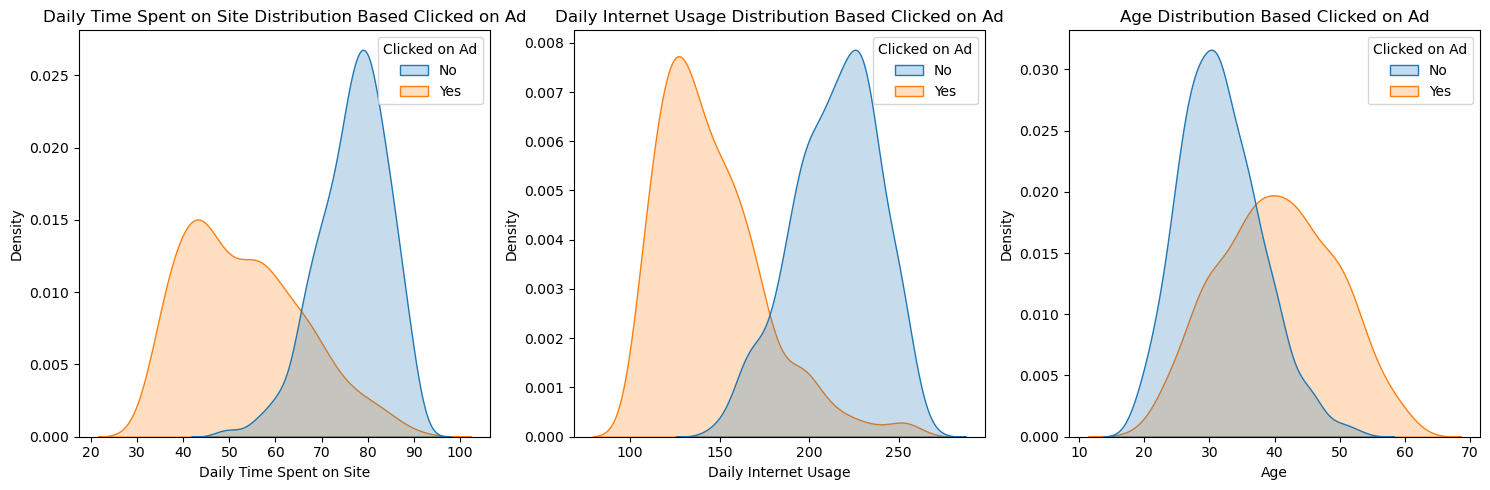

In [13]:
feats = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Age']

plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df, x=df[feats[i]], hue=df['Clicked on Ad'], fill=True).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

#### *Numerical Feature and Click on Ads*

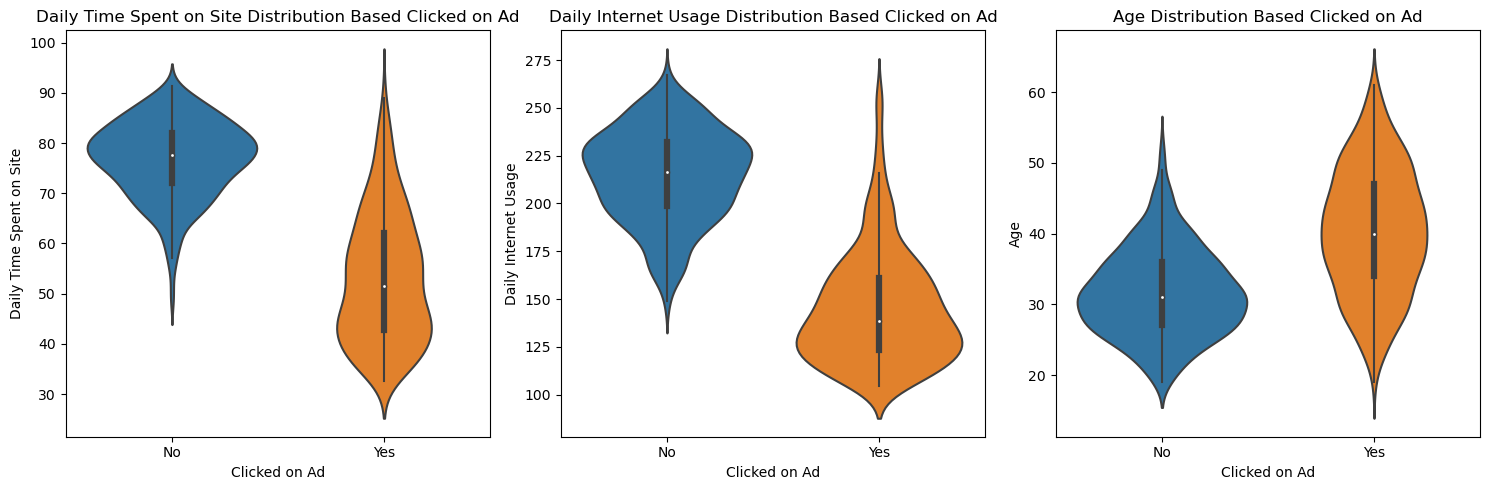

In [14]:
# distribusi menggunakan violinplot
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.violinplot(df, y=df[feats[i]], x=df['Clicked on Ad']).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

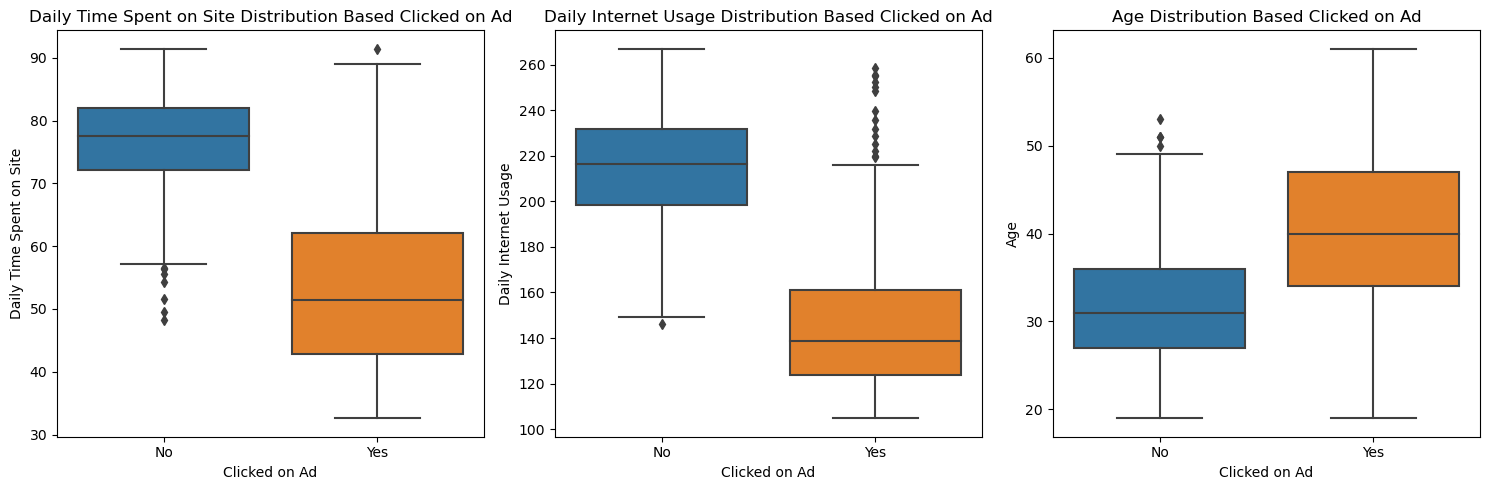

In [15]:
# distribusi menggunakan boxplot
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df, y=df[feats[i]], x=df['Clicked on Ad'], orient='v').set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

Key Takeways:
- **Daily Time Spent**
    - **User yang jarang menghabiskan waktu di sebuah situs (kurang dari 1 jam) memiliki potensi untuk mengklik iklan yang lebih besar**
- **Daily Internet Usage**
    - **User yang jarang menggunakan internet memiliki potensi untuk mengklik iklan yang lebih besar dibandingkan user yang sering menggunakan internet**. User internet yang jarang menggunakan internet mungkin memiliki rasa ingin tahu yang lebih besar tentang produk atau layanan yang ditawarkan melalui iklan. Karena mereka kurang terbiasa dengan internet, mereka mungkin merasa tertarik dengan iklan dan ingin mengetahui lebih banyak tentang produk. Kemungkinan lainnya adalah karena keterbatasan akses internet pada informasi yang ditawarkan, ketika user menemukan iklan yang menarik, mereka lebih mungkin untuk mengklik iklan tersebut untuk mendapatkan informasi yang lebih lengkap.
- **Age**
    - **User yang lebih tua memiliki potensi mengklik iklan yang lebih besar**. Kumungkinan pengguna internet yang lebih muda lebih terbiasa dengan teknologi dan internet, sehingga mereka mungkin lebih mampu menemukan informasi yang mereka butuhkan melalui sumber lain selain iklan. Mereka mungkin juga lebih kritis dalam menilai iklan, dan lebih memilih untuk menghindari iklan yang terlalu mengganggu atau tidak relevan.

#### *Categorical Feature and Click on Ads*

In [16]:
def ratio_with_target(feats):
    ratio_df = df.groupby([feats,'Clicked on Ad']).agg({'Unnamed: 0' : 'count'}).reset_index()
    ratio_df.columns = [feats,'Clicked on Ad','total']
    ratio_df['ratio'] = ratio_df.groupby(feats).apply(lambda x: round(x.total/x.total.sum() *100, 0)).values.astype(int)
    ratio_df = ratio_df.pivot_table(index=feats, columns='Clicked on Ad', values='ratio')
    ratio_df = ratio_df.sort_values(by=['Yes'], ascending=True)
    return ratio_df

#---------------------------------------------------------------------------------------------------------

# visualisasi
def cat_visualization(fitur, judul):
    fig, ax = plt.subplots(1,2, figsize=(15,7))
    
    # count
    ax[0].set_title(f'Clicked on Ad Distribution by {judul}\n', fontsize=14)
    sns.countplot(y=fitur, data = df, hue = 'Clicked on Ad', ax=ax[0], palette = ['#1f77b4', '#ff7f0e'],
                 order = df[fitur].value_counts().index)
    ax[0].bar_label(ax[0].containers[0], fontsize=11) 
    ax[0].bar_label(ax[0].containers[1], fontsize=11)
    # ax[0].set_yticks([])
    # ax[0].tick_params(axis='x', rotation=90)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    
    
    #percentage
    ax[1].set_title(f'Pecentage of Clicked on Ad by {judul}\n', fontsize=14)
    ratio_with_target(fitur).plot(kind='barh', stacked=True, ax=ax[1], color = ['#1f77b4', '#ff7f0e'])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                        ha='center', va='center', fontsize=12)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

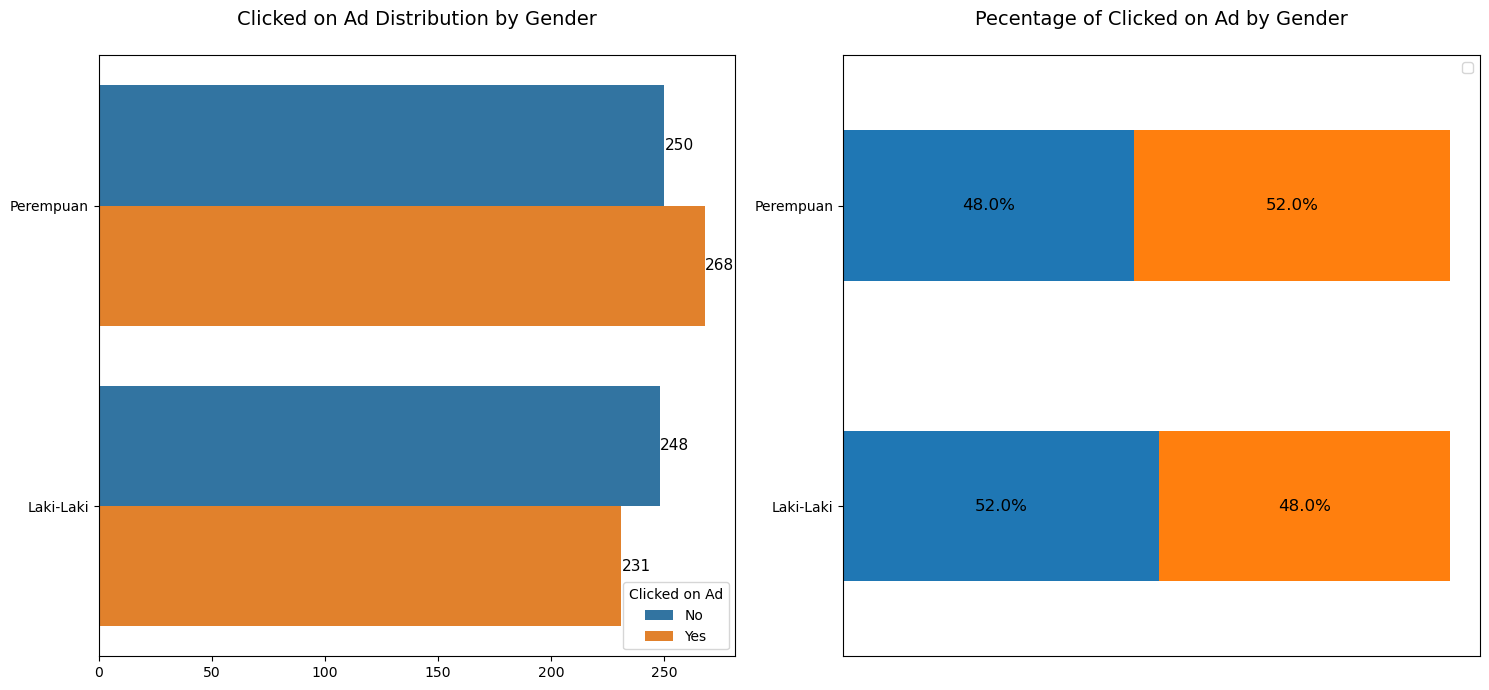

In [17]:
cat_visualization('Male', 'Gender')

Key Takeaways:
- Secara keseluruhan perbedaan gender pada potensi klik iklan tidak terlalu signifikan

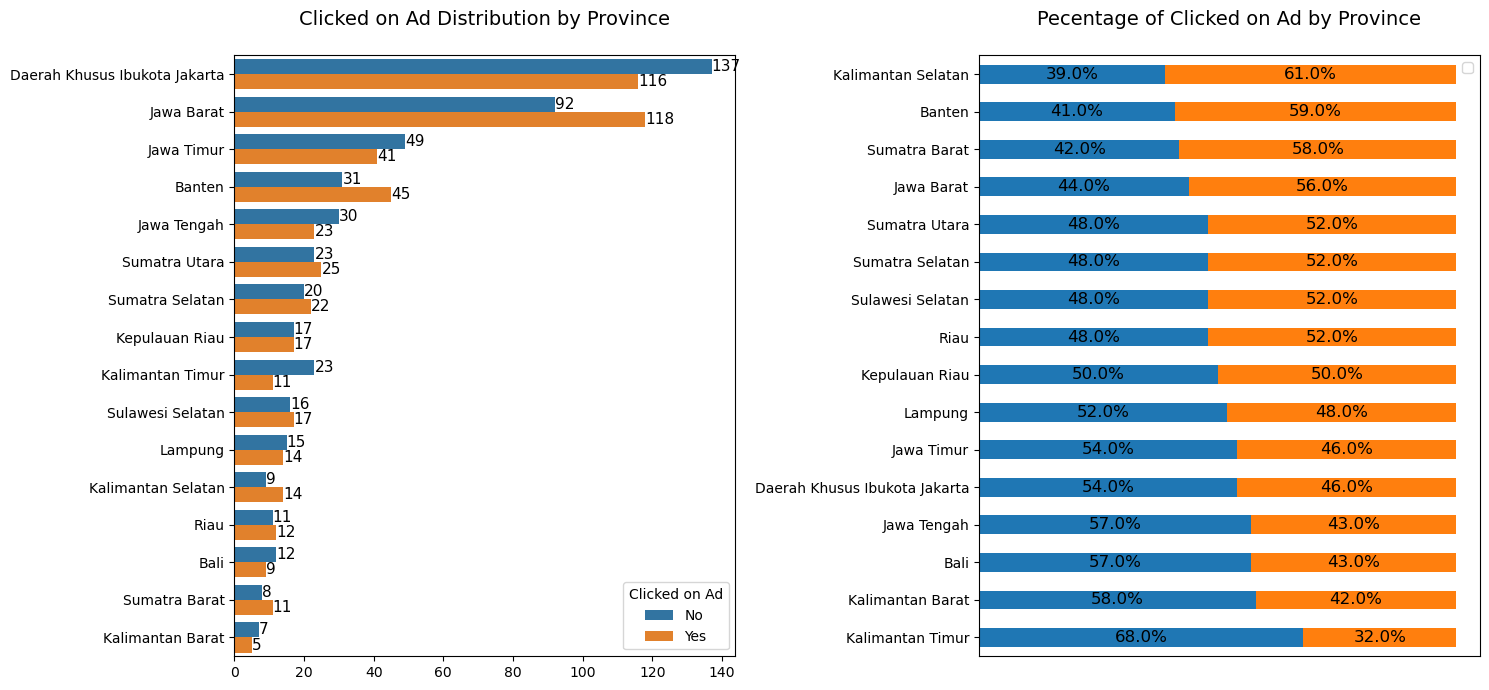

In [18]:
cat_visualization('province', 'Province')

Key Takeaways: 
- Mayoritas user berasal dari Pulau Jawa
- Kalimantan Selatan dan Sumatra Barat memiliki jumlah user yang sedikit namun memiliki potensi klik iklan yang lebih besar

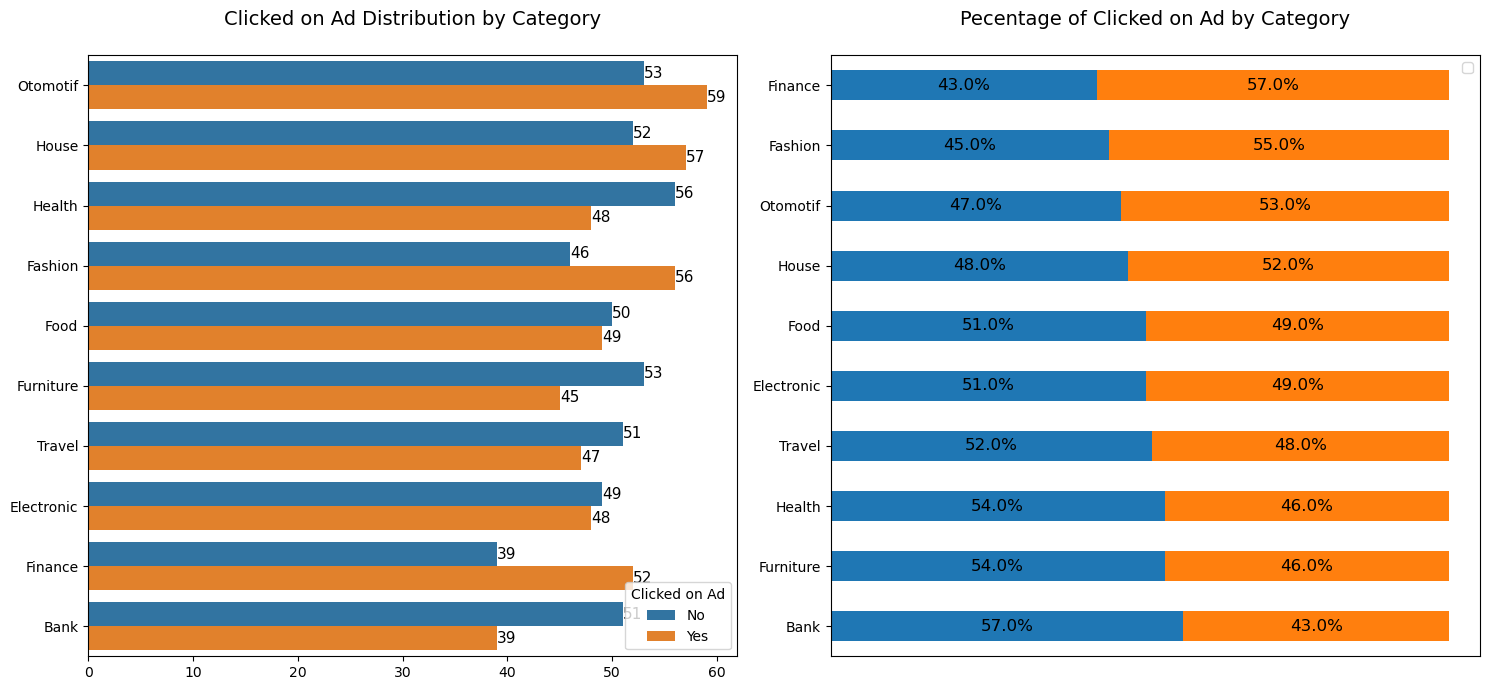

In [19]:
cat_visualization('category', 'Category')

Key Takeaways: 
- Potensi jenis kategori produk iklan terhadap klik user tidak terlalu berbeda signifikan.
- Kategori dengan potensi klik tertinggi adalah Finance, Fashion, dan Otomotif

#### *Sessions and Click on Ads*

Menganalisis waktu potensial bagi user yang mengklik iklan penting karena dapat memberikan wawasan yang berharga tentang perilaku pengguna dan membantu perusahaan mengoptimalkan strategi pemasaran mereka.

In [20]:
df1 = df.copy()

Sebelumnya dilakukan ekstraksi bulan, waktu perminggu, dan jam dari fitur `Timestamp`

In [21]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

df1['Month'] = df1['Timestamp'].dt.month
df1['Week_day'] = df1['Timestamp'].dt.dayofweek
df1['Hour'] = df1['Timestamp'].dt.hour
df1 = df1.drop(['Timestamp'], axis=1)

**Monthly**

<AxesSubplot: xlabel='Month', ylabel='count'>

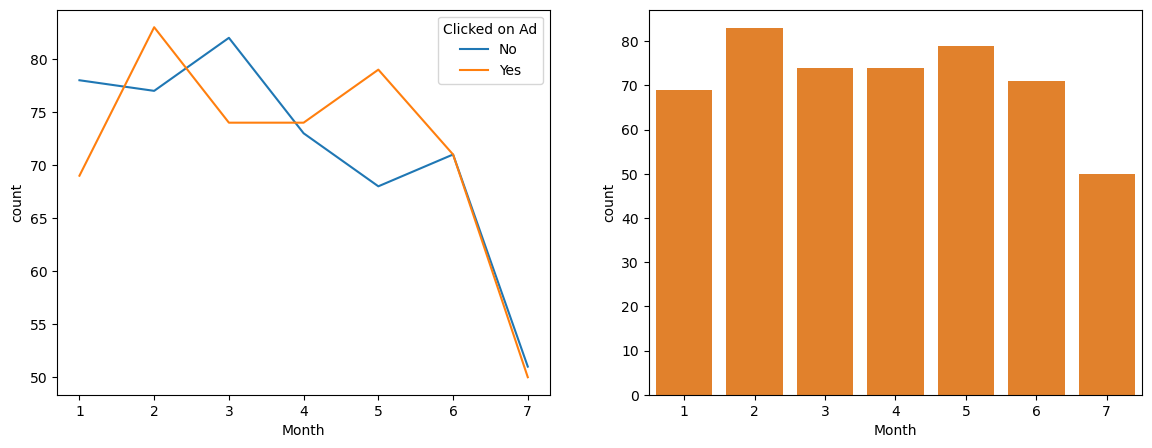

In [22]:
clicked_per_month = df1.groupby(['Month', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_month.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_month.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Month', y='count', hue='Clicked on Ad', data=clicked_per_month, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Month', color='#ff7f0e', ax = ax[1])

Key Takeaways:
- Banyak user yang mengklik iklan di bulan Februari dan Mei

**Days in Week**

<AxesSubplot: xlabel='Week_day', ylabel='count'>

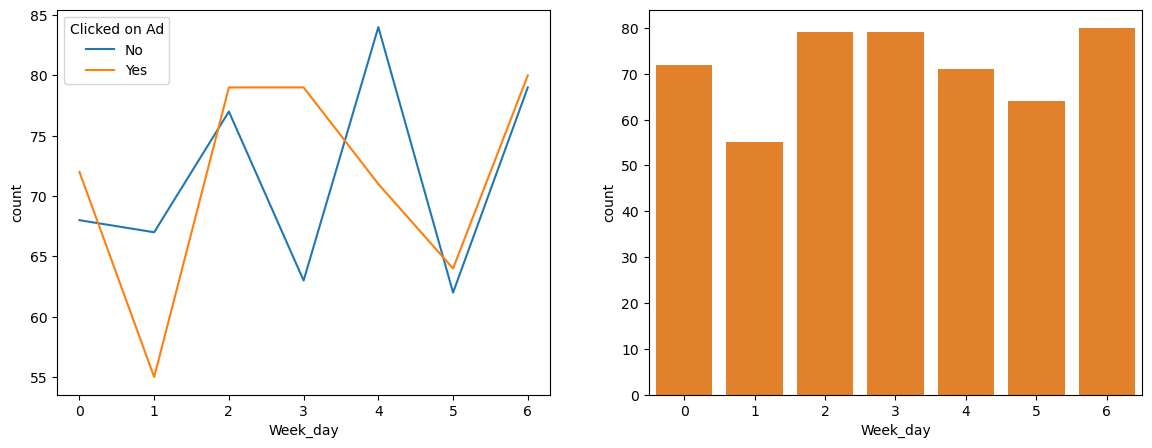

In [23]:
clicked_per_wkday = df1.groupby(['Week_day', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_wkday.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_wkday.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Week_day', y='count', hue='Clicked on Ad', data=clicked_per_wkday, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Week_day', color='#ff7f0e', ax = ax[1])

Key Takeaways:
- Sedikit sekali user yang mengklik iklan di hari Senin dan Jumat
- Hari Rabu memiliki konversi klik iklan yang paling baik, jumlah user yang mengklik user tinggi dan yang tidak mengklik rendah
- Hari Senin dan Jumat sering kali dianggap sebagai awal dan akhir minggu kerja, di mana orang cenderung sibuk dengan pekerjaan dan kurang fokus pada aktivitas online seperti mengklik iklan. Sebaliknya, hari Rabu mungkin merupakan titik tengah minggu di mana orang merasa lebih rileks dan memiliki lebih banyak waktu untuk menghabiskan waktu online dan berbelanja.

**Hourly**

<AxesSubplot: xlabel='Hour', ylabel='count'>

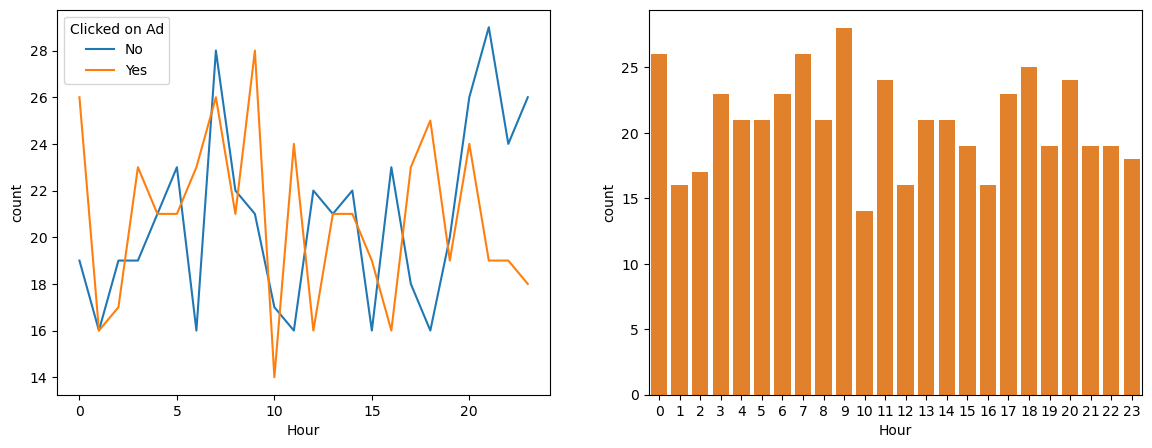

In [24]:
clicked_per_hr = df1.groupby(['Hour', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_hr.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_hr.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Hour', y='count', hue='Clicked on Ad', data=clicked_per_hr, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Hour', color='#ff7f0e', ax = ax[1])

Key Takeaways:
- Potensi user mengklik iklan dan memiliki konversi pembelian tinggi di jam 00.00, 09.00, 11.00, dan 18.00
- Jam-jam yang disebutkan mungkin berhubungan dengan kebiasaan pengguna dalam menggunakan perangkat digital. Pada jam 00.00, orang mungkin tidak memiliki kewajiban atau tugas yang mendesak, sehingga lebih cenderung menghabiskan waktu online. Jam 09.00 dan 11.00 mungkin menjadi waktu ketika orang memiliki jeda dalam pekerjaan atau istirahat singkat, sementara jam 18.00 adalah waktu setelah pekerjaan selesai di mana mereka dapat fokus pada kegiatan pribadi.

### Multivariate Analysis
---

**Pairplot 'Daily Time Spent on Site', 'Age', 'Daily Internet Usage'**

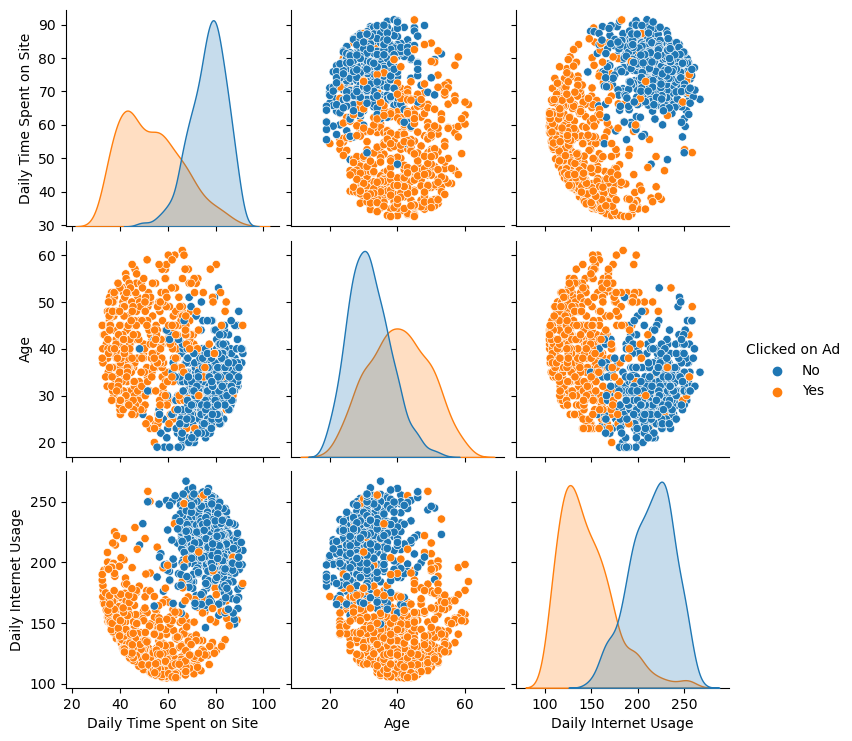

In [25]:
feats = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']
sns.pairplot(data=df1, vars=feats, hue='Clicked on Ad')

Key Takeaways:
- Dari visualisasi pairplot distribusi user menjadi dua segmen
- Dari Daily Internet Usage dengan Daily Time Spent on Site user dapat dikategorikan menjadi aktif nan non-aktif
- Aktif user cenderung tidak terlalu suka mengklik iklan, sehingga perusahaan dapat mentargetkan iklannya kepada non-aktif user

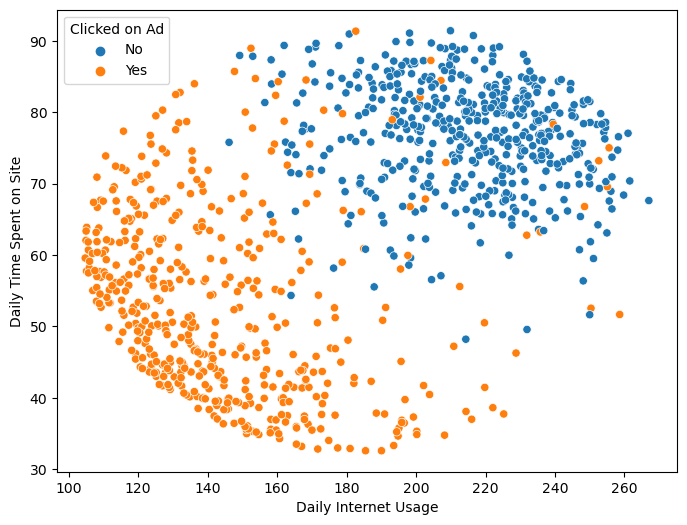

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Daily Internet Usage'],y=df['Daily Time Spent on Site'],hue=df['Clicked on Ad'])

plt.show()

**Heatmap** <br>
Mengetahui korelasi fitur-fitur terhadap target.

Sebelumnya dikarenakan fitur target masih data kategorikal maka dilakukan konversi kedalam nilai binary/boolean.

In [26]:
df1['Clicked on Ad'] = df1['Clicked on Ad'].map({'Yes':1, 'No':0})

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

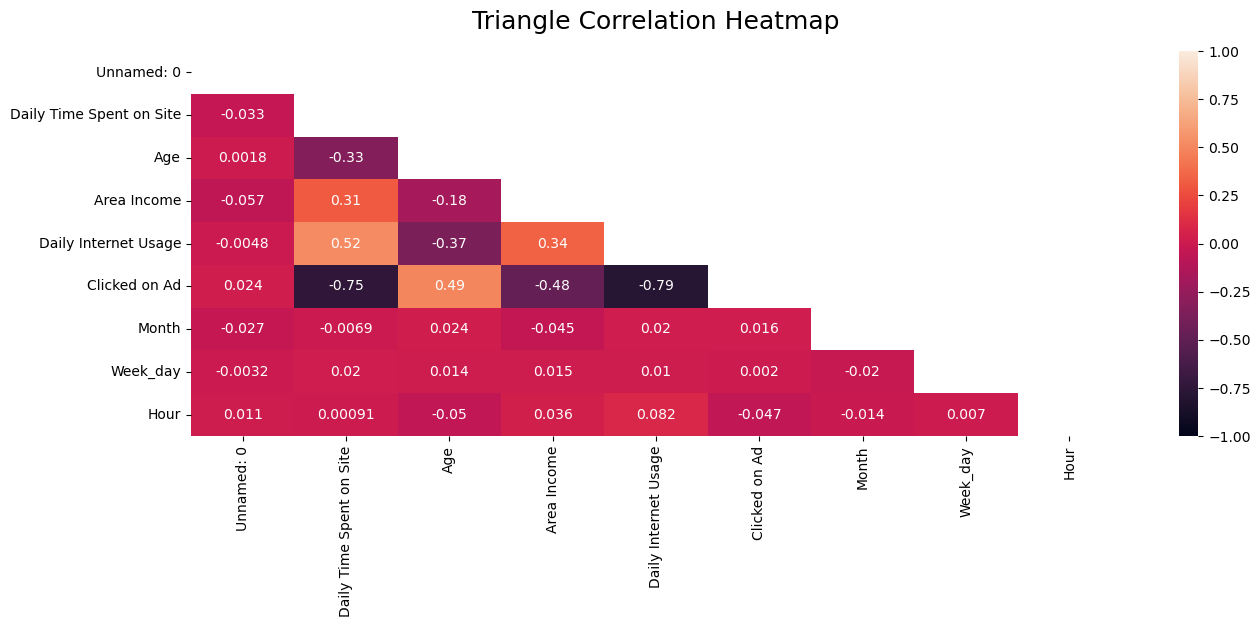

In [27]:
plt.figure(figsize=(15, 5))

mask = np.triu(np.ones_like(df1.corr(), dtype=np.bool))
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Key Takeaways:
- Tidak ditemukan multikoreanilitas atau fitur yang redundan.
- Terlihat bahwa fitur target atau Clicked on Ad memiliki korelasi yang kuat dengan Dayly Time Spent on Site, Age, Area Income, dan Daily Internet Usage.
- Pemakaian internet harian dan waktu yang dihabiskan memiliki korelasi yang positif yang kuat. Semakin besar pemakaian internet, semakin besar pula waktu yang dihabiskan user.
- Semakin besar income pengguna juga semakin besar pemakaian internet hariannya.

# **Data Preprocessing**
### Data Cleaning
---

In [28]:
df_cleaned = df1

**Handling Missing Value** <br>
- Pada fitur numerikal missing value diisi dengan median, karena lebih robust
- Pada fitur kategorikal missing value diisi dengan modus

In [29]:
df_cleaned.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Clicked on Ad                0
city                         0
province                     0
category                     0
Month                        0
Week_day                     0
Hour                         0
dtype: int64

In [30]:
df_cleaned.fillna(df_cleaned.median(), inplace=True)

In [31]:
df_cleaned['Male'].fillna(df_cleaned['Male'].mode()[0], inplace = True)

In [32]:
df_cleaned.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
city                        0
province                    0
category                    0
Month                       0
Week_day                    0
Hour                        0
dtype: int64

### Feature Encoding
---

- Label Encoding : `Male`
- One Hot Encoding : `Pulau`, `category`

In [33]:
df_prep = df_cleaned

In [34]:
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1}
df_prep['Male'] = df_prep['Male'].map(mapping_gender)

Fitur city dan province memiliki nilai banyak nilai unik. Sehingga diputuskan untuk membuat fitur baru yaitu pengkategorian menurut pulau untuk diterapkan pada model

In [35]:
df_prep['province'].unique()

array(['Daerah Khusus Ibukota Jakarta', 'Bali', 'Jawa Timur',
       'Kepulauan Riau', 'Sumatra Utara', 'Jawa Barat', 'Lampung',
       'Banten', 'Sumatra Barat', 'Jawa Tengah', 'Sulawesi Selatan',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Sumatra Selatan',
       'Kalimantan Timur', 'Riau'], dtype=object)

In [36]:
df_prep['Pulau'] = np.where((((df_prep['province']) == 'Daerah Khusus Ibukota Jakarta') 
                             | ((df_prep['province']) == 'Jawa Timur') 
                             | ((df_prep['province']) =='Jawa Barat') 
                             | ((df_prep['province']) =='Banten') 
                             | ((df_prep['province']) =='Jawa Tengah')), 'Jawa',
                            np.where(((df_prep['province']) == 'Kepulauan Riau')
                                     | ((df_prep['province']) == 'Sumatra Utara') 
                                     | ((df_prep['province']) == 'Lampung') 
                                     | ((df_prep['province']) == 'Sumatra Barat') 
                                     | ((df_prep['province']) == 'Sumatra Selatan'), 'Sumatra',
                                     np.where(((df_prep['province']) == 'Kalimantan Barat')
                                              | ((df_prep['province']) == 'Kalimantan Selatan')
                                              | ((df_prep['province']) == 'Kalimantan Timur') 
                                              | ((df_prep['province']) == 'Kalimantan'), 'Kalimantan',
                                              np.where(((df_prep['province']) == 'Bali'), 'Bali',
                                              'Sulawesi'))))

In [37]:
df_prep['Pulau'].value_counts()

Jawa          682
Sumatra       172
Kalimantan     69
Sulawesi       56
Bali           21
Name: Pulau, dtype: int64

Lalu melakukan One Hot Encoding terhadap fitur `Pulau` dan `category`

In [38]:
df_prep = pd.get_dummies(df_prep, columns=['Pulau'])

In [39]:
df_prep = pd.get_dummies(df_prep, columns=['category'])

In [40]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  1000 non-null   float64
 2   Age                       1000 non-null   int64  
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      1000 non-null   float64
 5   Male                      1000 non-null   int64  
 6   Clicked on Ad             1000 non-null   int64  
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   Month                     1000 non-null   int64  
 10  Week_day                  1000 non-null   int64  
 11  Hour                      1000 non-null   int64  
 12  Pulau_Bali                1000 non-null   uint8  
 13  Pulau_Jawa                1000 non-null   uint8  
 14  Pulau_Kal

### Feature Selection
---
Menghapus fitur yang tidak digunakan dalam model.

In [41]:
df_prep.drop(columns = ['Unnamed: 0', 'city', 'province'], inplace=True)

In [42]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Month                     1000 non-null   int64  
 7   Week_day                  1000 non-null   int64  
 8   Hour                      1000 non-null   int64  
 9   Pulau_Bali                1000 non-null   uint8  
 10  Pulau_Jawa                1000 non-null   uint8  
 11  Pulau_Kalimantan          1000 non-null   uint8  
 12  Pulau_Sulawesi            1000 non-null   uint8  
 13  Pulau_Sumatra             1000 non-null   uint8  
 14  category_

In [43]:
df_prep.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Week_day,Hour,Pulau_Bali,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
745,57.99,50,437262700.0,124.58,0,1,2,4,8,0,...,0,0,0,0,1,0,0,0,0,0
248,42.44,56,304150770.0,168.27,0,1,2,2,15,0,...,0,0,0,0,0,0,0,0,1,0
251,61.22,45,447186670.0,119.03,1,1,1,1,9,0,...,0,0,1,0,0,0,0,0,0,0


# **Modeling**

Pada tahapan akan dilakukan pencarian dan pembangunan sebuah model dengan tingkat akurasi yang tinggi. Matriks akurasi digunakan karena  jumlah kategori pada target yang digunakan seimbang. Salain itu percobaan akan dilakukan dengan menggunakan data train default (Experiment 1) dan menggunakan standardization (Experiment 2).

### Split Train Test
---

Split data train dan test dilakukan dengan perbandingan 70:30

In [44]:
df_model = df_prep.copy()

In [45]:
# define X (fitur) and y (target)
X = df_model.drop(columns='Clicked on Ad').copy()  
y = df_model['Clicked on Ad'].copy()

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [47]:
print('Split 70:30')
print('Total rows & column of train set:',X_train.shape)
print('Total rows & column of test set:',X_test.shape)

Split 70:30
Total rows & column of train set: (700, 23)
Total rows & column of test set: (300, 23)


In [48]:
y_train.value_counts()

0    354
1    346
Name: Clicked on Ad, dtype: int64

### Define Function for Experiment
---

In [49]:
from datetime import datetime as dt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


def experiment(X_train, X_test, y_train, y_test):
    models = [
        ('Logistic Regression', LogisticRegression(random_state=1)),
        ('KNN', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier(random_state=1)),
        ('SVC', SVC(random_state=1)),
        ('Random Forest', RandomForestClassifier(random_state=1)),
        ('AdaBoost', AdaBoostClassifier(random_state=1)),
        ('Gradient Boosting', GradientBoostingClassifier(random_state=1)),
        ('MLP', MLPClassifier(random_state=1)),
        ('XGBoost', XGBClassifier(random_state=1)),
        ('LGBM', LGBMClassifier(random_state=1))
    ]

    result = []
    for name, model in models:
        start = dt.now()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        duration = (dt.now()-start).total_seconds()

        # evaluasi
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        result.append((name, accuracy, precision, recall, f1, duration))

    df_comparison = pd.DataFrame(result, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'Duration'])
    return df_comparison

### Experiment 1 - Mechine Learning Model Without Normalization/Standardization
---

In [50]:
exp1 = experiment(X_train, X_test, y_train, y_test)
exp1.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1,Duration
4,Random Forest,0.960000,0.993056,0.928571,0.959732,0.200129
6,Gradient Boosting,0.953333,0.986111,0.922078,0.953020,0.238536
8,XGBoost,0.953333,0.979452,0.928571,0.953333,0.134795
9,LGBM,0.950000,0.986014,0.915584,0.949495,0.130329
2,Decision Tree,0.946667,0.966216,0.928571,0.947020,0.012987
5,AdaBoost,0.940000,0.978873,0.902597,0.939189,0.102607
3,SVC,0.686667,0.800000,0.519481,0.629921,0.052675
1,KNN,0.650000,0.689922,0.577922,0.628975,0.025848
0,Logistic Regression,0.486667,0.000000,0.000000,0.000000,0.035244
7,MLP,0.486667,0.000000,0.000000,0.000000,0.104576


Key takeaways :
- Hasil model tanpa standardisasi yang memiliki nilai akurasi tertinggi adalah Random Forest.
- Algoritma lain yang juga memiliki akurasi yang tinggi adalah Gradient Boosting, XGBoost, dan LGBM degan nilai 95%.
- Algoritma Logistic Regression dan MLP memiliki akurasi yang sangat rendah, hal tersebut dapat mengakibatkan hasil prediksi yang kurang bagus.

### Experiment 2 - Mechine Learning Model With Normalization/Standardization
---

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [60]:
exp2 = experiment(X_train_scaled, X_test_scaled, y_train, y_test)
exp2.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1,Duration
4,Random Forest,0.960000,0.986301,0.935065,0.960000,0.225412
8,XGBoost,0.956667,0.979592,0.935065,0.956811,0.082322
3,SVC,0.953333,0.986111,0.922078,0.953020,0.045166
6,Gradient Boosting,0.953333,0.979452,0.928571,0.953333,0.194056
7,MLP,0.953333,0.979452,0.928571,0.953333,0.928606
0,Logistic Regression,0.950000,0.972789,0.928571,0.950166,0.021258
9,LGBM,0.950000,0.979310,0.922078,0.949833,0.163605
2,Decision Tree,0.943333,0.959732,0.928571,0.943894,0.006328
5,AdaBoost,0.936667,0.959184,0.915584,0.936877,0.104253
1,KNN,0.886667,0.968750,0.805195,0.879433,0.030646


Key takeaways :
- Model yang menggunakan standardisasi dengan algoritma Random Forest menunjukkan tingkat akurasi yang tertinggi. Selain itu, diperhatikan bahwa nilai akurasinya tidak berbeda signifikan dengan hasil eksperimen pertama, yaitu mencapai 96%.
- Nilai akurasi juga tidak banyak berbeda pada algoritma XBoost, Gradient Boosting, dan LGBM.
- Pada algoritma SVC dan Logistic Regression hasil akurasi meningkat secara signifikan dengan menggunakan standardization. 

Beberapa faktor yang dapat mempengaruhi mengapa nilai akurasi model menggunakan algoritma Random Forest, XGBoost, Gradient Boosting, dan LightGBM tetap sama ketika fitur distandardisasi dan tidak distandardisasi:
- Model tersebut tidak terlalu sensitif terhadap skala fitur. Artinya, perbedaan dalam skala fitur tidak secara signifikan mempengaruhi kinerja model. Oleh karena itu, penggunaan standardisasi tidak memberikan perubahan yang signifikan pada nilai akurasi.
- Termasuk algoritma yang robust dan memiliki kemampuan yang kuat dalam menangani berbagai jenis data tanpa perlu melakukan preprocessing yang rumit. Mereka mampu menyesuaikan dengan baik terhadap data yang tidak distandardisasi.

### Model Evaluation
---

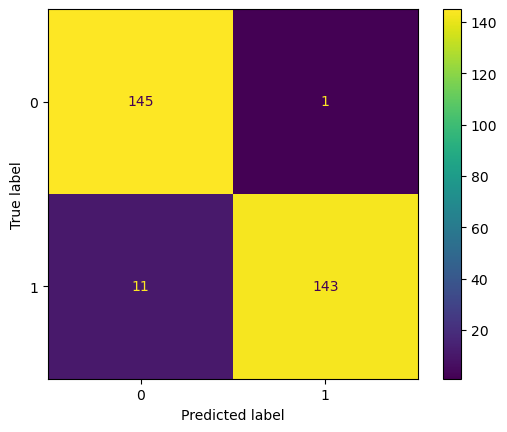

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_model = RandomForestClassifier(random_state=1)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
disp.plot()

Key takeaways:
- Berdasarkan evaluasi algoritma Random Forest dari confussion matrix terlihat bahwa model sangat baik memprediksi user yang klik iklan atau tidak dengan nilai kesalahan prediksi yang kecil.
    - Terdapat 145 prediksi benar yang diklasifikasikan sebagai bukan klik iklan (True Negatives, TN).
    - Terdapat 1 prediksi salah yang diklasifikasikan sebagai klik iklan padahal sebenarnya bukan (False Positives, FP).
    - Terdapat 11 prediksi salah yang diklasifikasikan sebagai bukan klik iklan padahal sebenarnya adalah klik iklan (False Negatives, FN).
    - Terdapat 143 prediksi benar yang diklasifikasikan sebagai klik iklan (True Positives, TP).

### Feature Importance with SHAP
---

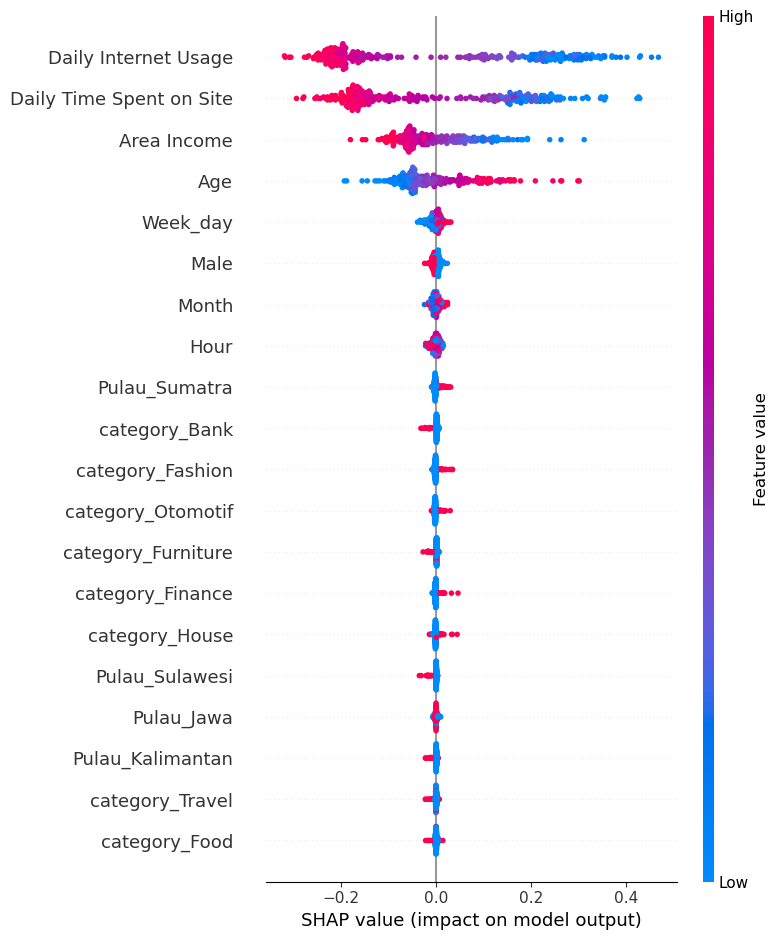

In [62]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)

Key takeaways:
- Dari plot SHAP dapat dilihat fitur yang mempengaruhi prediksi klik pada iklan diantaranya adalah `Daily Internet Usage`, `Daily Time Spent on Site`, `Area Income`, dan `Age`
- `Daily Internet Usage`, `Daily Time Spent on Site`, `Area Income` memiliki korelasi negatif terhadap klik iklan (warna merah disebelah kiri). Hal ini berarti user yang bersifat non-aktif user dalam penggunaan internet dan user yang memiliki pendapatan menengah kebawah memiliki potensi klik iklan yang lebih besar.
- Sedangkan fitur `Age` memiliki korelasi yang positif. Artinya semakin tua usia user maka akan berpotensi terdapat klik iklan.

# **Save Model Mechine Learning**
### Dump & Load Trained Model
---

In [38]:
import joblib

joblib.dump(final_model, 'clicked_ads_classifier_randomforest.joblib')

['clicked_ads_classifier_randomforest.joblib']

In [39]:
production_model = joblib.load('clicked_ads_classifier_randomforest.joblib')